In [95]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [96]:
import glob, os

# Join all labeled data

df = pd.DataFrame()

os.chdir("../../data/classifier/")
for file in glob.glob("*.csv"):
    if(file == "candidato.csv" or file == "concat.csv"):
        continue
    df_partial = pd.read_csv(file)
    df = pd.concat([df, df_partial], ignore_index=True)
df = df.drop('edit_history_tweet_ids', axis=1)
df

,id,text,label
0,1576050330114363392,@joicehasselmann Bolsonaro NÃO quer aproveitad...,-1
1,1576050330110160901,o bolsonaro é um anjo enviado de deus para nos...,1
2,1576050318852640769,@AndradeRNegro2 @Loucosdovalle Bolsonaro é con...,1
3,1576050318596399104,@Victorrmsk É a milésima vez que ele fala ao v...,0
4,1576050309822287873,"@OGloboPolitica Bolsonaro é tão fake, q até o ...",-1
...,...,...,...
737,1597340352733904897,@PATRlOTAS Esse idiota @BolsonaroSP não se ele...,-1
738,1597340328813506560,@rafaelgloves Depois disso se o pai dele nao d...,-1
739,1597340303308259329,@ducavendish Modinha de cretinos. Bolsonaro é ...,1
740,1597340274724069376,"Tantos corruptos na política, tantos corruptos...",r


In [97]:
# Shape of dataframe

df.shape

(742, 3)

In [98]:
# Basic informations of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      742 non-null    int64 
 1   text    742 non-null    object
 2   label   742 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.5+ KB


In [99]:
#Check null elements

df.isnull().sum()

id       0
text     0
label    0
dtype: int64

In [100]:
# Check duplicate rows

len(df)-len(df.drop_duplicates())

0

In [101]:
# Count number of words in each text

count = df['text'].str.split().str.len()
df['num_words'] = count
df.head()

,id,text,label,num_words
0,1576050330114363392,@joicehasselmann Bolsonaro NÃO quer aproveitad...,-1,7
1,1576050330110160901,o bolsonaro é um anjo enviado de deus para nos...,1,22
2,1576050318852640769,@AndradeRNegro2 @Loucosdovalle Bolsonaro é con...,1,28
3,1576050318596399104,@Victorrmsk É a milésima vez que ele fala ao v...,0,15
4,1576050309822287873,"@OGloboPolitica Bolsonaro é tão fake, q até o ...",-1,18


In [102]:
# Get max number of words in dataset

df['num_words'].max()

64

In [103]:
# View number of distribution classes

df['label'].apply(str).value_counts()

-1    302
0     296
1     104
r      40
Name: label, dtype: int64

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


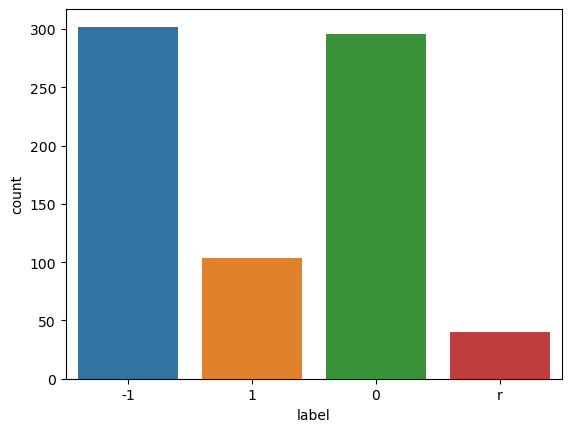

In [104]:
# Distribution of classes

sns.countplot(df['label'].apply(str))
plt.xlabel('label')
plt.savefig('../../data/images/classes.png', dpi = 1200)

In [105]:
# creating the text variable

text_cloud = " ".join(title for title in df['text'])

In [106]:
from wordcloud import WordCloud

# Generate a word cloud

wordcloud = WordCloud(collocation_threshold = 2,
                      collocations= True,
                      background_color="white",
                      colormap="afmhot", 
                      width = 2048, 
                      height = 1080).generate(text_cloud)

# Saving the image

wordcloud.to_file('../../data/images/wordcloud.png')

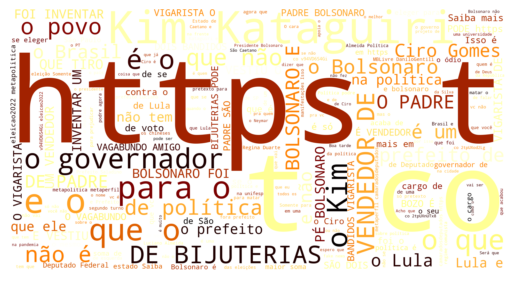

In [107]:
# Display the generated Word Cloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [108]:
#Save dataframe

df.to_csv('../../data/classifier/concat.csv',index=False)